In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [7]:
def load_images_from_folder(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return images, labels

In [8]:
# Load train dataset
train_cats_path = "train/cats"
train_dogs_path = "train/dogs"
train_images, train_labels = [], []

cats_images, cats_labels = load_images_from_folder(train_cats_path, 0)
dogs_images, dogs_labels = load_images_from_folder(train_dogs_path, 1)

train_images.extend(cats_images)
train_images.extend(dogs_images)
train_labels.extend(cats_labels)
train_labels.extend(dogs_labels)

# Convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [9]:
# Load test dataset similarly
test_cats_path = "test/cats"
test_dogs_path = "test/dogs"
test_images, test_labels = [], []

cats_images, cats_labels = load_images_from_folder(test_cats_path, 0)
dogs_images, dogs_labels = load_images_from_folder(test_dogs_path, 1)

test_images.extend(cats_images)
test_images.extend(dogs_images)
test_labels.extend(cats_labels)
test_labels.extend(dogs_labels)

# Convert to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [11]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [12]:
# Create a model to output the feature maps
model = Model(inputs=base_model.input, outputs=base_model.output)

In [13]:
# Extract features for train and test datasets
train_features = model.predict(train_images)
test_features = model.predict(test_images)

625/625 ━━━━━━━━━━━━━━━━━━━━ 517s 826ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 135s 859ms/step


In [14]:
# Flatten the features to be used in SVM
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)

SVC(kernel='linear')

In [17]:
# Predict on the test set
test_predictions = svm_model.predict(test_features)

In [18]:
# Evaluate the model
accuracy = accuracy_score(test_labels, test_predictions)
report = classification_report(test_labels, test_predictions)

In [19]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8048
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2500
           1       0.81      0.80      0.80      2500

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



In [26]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
The image is a Dog.


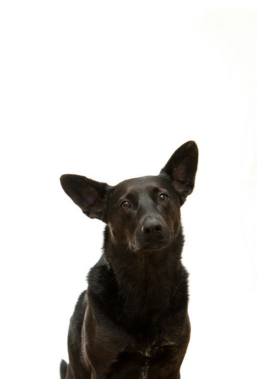

In [33]:
def display_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

def preprocess_image(image_path, img_size=(64, 64)):
    # Load image
    img = cv2.imread(image_path)
    if img is not None:
        # Resize image
        img = cv2.resize(img, img_size)
        # Normalize image
        img = img / 255.0
        # Expand dimensions to match the input shape of the model
        img = np.expand_dims(img, axis=0)
    return img

def extract_features(model, img):
    # Extract features using the pre-trained VGG16 model
    features = model.predict(img)
    # Flatten the features to be used in SVM
    features = features.reshape(features.shape[0], -1)
    return features

def predict_image(image_path, feature_extractor_model, svm_model):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Extract features
    features = extract_features(feature_extractor_model, img)
    # Predict using the trained SVM model
    prediction = svm_model.predict(features)
    return prediction[0]

# Paths to the new images to be predicted
image_path = "test photo.jpg"

# Predict the class of the new image
prediction = predict_image(new_image_path, model, svm_model)

# Output the result
if prediction == 0:
    print("The image is a Cat.")
else:
    print("The image is a Dog.")
    
display_image(image_path)